## Precision-recall for significant interactions

This notebook calculates estimates of precision and recall for OpenCell interactions and various reference datasets. This is used in Figure S4C-E.

In [4]:
import pandas as pd
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append('../../scripts/')
sys.path.append('../../scripts/interactome_precision_recall')
from pyseus import validation_analysis

%matplotlib inline

### Load datasets

Reference PPI datasets were acquired from Bioplex 3.0, HuRi, and Hein et al 2015, and processed to include only necessary columns (targets/preys) to reduce storage on Github. Reference ground truths used are CORUM complexes and Hela colocalization data from Itzhak et al., 2016.

In [6]:
data_root = pathlib.Path('../../data')

# import PPI datasets
oc = pd.read_csv(data_root / 'ppi_analysis' / 'precision_recall' / 'opencell.csv')
bioplex = pd.read_csv(data_root / 'external' / 'bioplex_3.0.csv')
hein = pd.read_csv(data_root / 'external' / 'Hein_2015.csv')
huri = pd.read_csv(data_root / 'external' / 'huri.csv')

# import ground truths
corum = pd.read_csv(data_root / 'external' / 'corum_unique_interactions.csv')
hela_loc = pd.read_excel(data_root / 'external' / 'hela_localization.xlsx', engine='openpyxl')
hela_loc = hela_loc[['gene_names', 'mnc_classifier']].copy()

### Calculate CORUM-coverage-based recall and colocalization-based precision
This is done for both for direct interactions and second neighbors.

In [ ]:
datasets = ['HuRi', 'Hein 2015', 'Bioplex 3.0', 'OpenCell']

recall_directs = []
recall_neighbors = []
precisions = []

for i, dataset in enumerate([huri, hein, bioplex, oc]):
    print("Working on Precision/Recall of " + datasets[i])
    
    analysis = validation_analysis.Validation(
        hit_table=None, 
        target_col='target', 
        prey_col='prey',
        corum=corum, 
        localization_table=hela_loc, 
        interaction_table=dataset
    )
    
    # CORUM recall for direct interactors
    analysis.corum_interaction_coverage(distance=False)
    recall_directs.append(100*analysis.recall)

    # CORUM recall for second neighbors
    analysis.corum_interaction_coverage(distance=True)
    recall_neighbors.append(100*analysis.recall)

    # precision from co-localization
    analysis.colocalization_precision()
    precisions.append(100*analysis.precision)

### Plot the CORUM coverage (recall) for all datasets

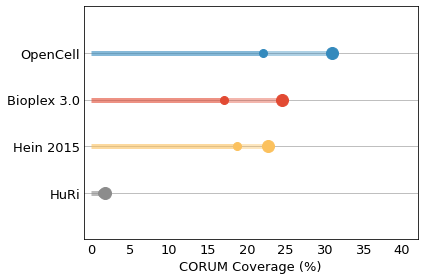

In [10]:
# Direct neighbor corum coverages  
colors = ['#8c8c8c', '#FBC15E', '#E24A33', '#348ABD']

# OC
plt.hlines(y=1,xmin=0,xmax=recall_directs[0], color=colors[0], linewidth=5, alpha=0.6)
plt.plot(recall_directs[0], 1, 'o', color=colors[0], markersize=8)

# Bioplex
plt.hlines(y=2,xmin=0,xmax=recall_directs[1], color=colors[1], linewidth=5, alpha=0.6)
plt.plot(recall_directs[1], 2,'o', color=colors[1], markersize=8)

# Hein
plt.hlines(y=3,xmin=0,xmax=recall_directs[2], color=colors[2], linewidth=5, alpha=0.6)
plt.plot(recall_directs[2], 3,'o', color=colors[2], markersize=8)

# HuRi
plt.hlines(y=4,xmin=0,xmax=recall_directs[3], color=colors[3], linewidth=5, alpha=0.6)
plt.plot(recall_directs[3], 4,'o', color=colors[3], markersize=8)

# Second neighbor corum coverages
plt.hlines(y=1,xmin=recall_directs[0],xmax=recall_neighbors[0], color=colors[0], linewidth=5, alpha=0.4)
plt.plot(recall_neighbors[0], 1, 'o', color=colors[0], markersize=12)

plt.hlines(y=2,xmin=recall_directs[1],xmax=recall_neighbors[1], color=colors[1], linewidth=5, alpha=0.4)
plt.plot(recall_neighbors[1], 2,'o', color=colors[1], markersize=12)

plt.hlines(y=3,xmin=recall_directs[2],xmax=recall_neighbors[2], color=colors[2], linewidth=5, alpha=0.4)
plt.plot(recall_neighbors[2], 3,'o', color=colors[2], markersize=12)

plt.hlines(y=4,xmin=recall_directs[3],xmax=recall_neighbors[3], color=colors[3], linewidth=5, alpha=0.4)
plt.plot(recall_neighbors[3], 4,'o', color=colors[3], markersize=12)


# plot labels
plt.yticks(np.arange(1,5), datasets)

# manual x ticks
plt.xticks(np.arange(0,41,5))
# manual x lims
plt.xlim(-1,42)
# manual y lims
plt.ylim(0,5)

plt.xlabel('CORUM Coverage (%)', fontsize=13)

# only y grid lines
plt.grid(axis='y')

# label fontsizes
plt.tick_params(labelsize=13, length=0)
plt.tight_layout()
plt.savefig('CORUM_recall_datasets_20210930.pdf', bbox_inches='tight')

### Plot the precision values for all datasets

In [21]:
# calculate precision for CORUM
precision_datasets = ['HuRi', 'Hein 2015', 'Bioplex 3.0', 'OpenCell','',  'CORUM']
# analysis = vali.Validation(hit_table=None, target_col='prot_1', prey_col='prot_2',
#         corum=corum, localization_table=hela_loc, interaction_table=corum)

# analysis.colocalization_precision()
# precisions.insert(0, 100 * analysis.precision)
del precisions[0]
precisions.append(100* analysis.precision)

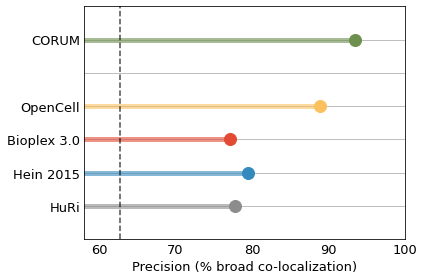

In [24]:
plt.hlines(y=1,xmin=0,xmax=precisions[0], color='#8c8c8c', linewidth=5, alpha=0.6)
plt.plot(precisions[0], 1,'o', color='#8c8c8c', markersize=12)

plt.hlines(y=2,xmin=0,xmax=precisions[1], color='#348ABD', linewidth=5, alpha=0.6)
plt.plot(precisions[1], 2, 'o', color='#348ABD', markersize=12)

plt.hlines(y=3,xmin=0,xmax=precisions[2], color='#E24A33', linewidth=5, alpha=0.6)
plt.plot(precisions[2], 3,'o', color='#E24A33', markersize=12)

plt.hlines(y=4,xmin=0,xmax=precisions[3], color='#FBC15E', linewidth=5, alpha=0.6)
plt.plot(precisions[3], 4,'o', color='#FBC15E', markersize=12)

plt.hlines(y=6,xmin=0,xmax=precisions[4], color='#6d904f', linewidth=5, alpha=0.6)
plt.plot(precisions[4], 6,'o', color='#6d904f', markersize=12)


plt.vlines(x=62.72, ymin=0, ymax=7, linestyle='dashed', color='black', alpha=0.7)

# plot labels
plt.yticks(np.arange(1,7), precision_datasets)

# manual x ticks
plt.xticks(np.arange(60,101,10))
# manual x lims
plt.xlim(58,100)
# manual y lims
plt.ylim(0,7)

plt.xlabel('Precision (% broad co-localization)', fontsize=13)

# only y grid lines
plt.grid(axis='y')

# label fontsizes
plt.tick_params(labelsize=13, length=0)
plt.tight_layout()
plt.savefig('colocalization_precision_datasets_20210920.pdf', bbox_inches='tight')

In [11]:
toroot = '../../data/ppi_analysis/precision_recall/ignore/'
oc_plex_int = pd.read_csv(toroot + 'plex_OC_intersection.csv')
plex_only = pd.read_csv(toroot + 'plex_only.csv')
oc_only = pd.read_csv(toroot + 'oc_only.csv')

In [34]:
oc_all = pd.concat([oc_plex_int, oc_only])
plex_all = pd.concat([plex_only, oc_plex_int])

In [53]:
dats = [oc_plex_int, oc_only, plex_only, oc_all, plex_all]
dat_precisions = []
for dat in dats:
    analysis = validation_analysis.Validation(
        hit_table=None, 
        target_col='prot_1', 
        prey_col='prot_2',
        corum=corum, 
        localization_table=hela_loc, 
        interaction_table=dat
    )

    analysis.colocalization_precision()
    dat_precisions.append(100 * analysis.precision)

In [54]:
dat_precisions

[94.78899082568807,
 90.51264207840408,
 79.26706827309236,
 91.25686550006387,
 83.22266903581782]

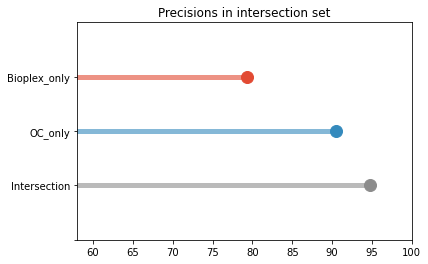

In [62]:
plt.hlines(y=1,xmin=0,xmax=dat_precisions[0], color='#8c8c8c', linewidth=5, alpha=0.6)
plt.plot(dat_precisions[0], 1,'o', color='#8c8c8c', markersize=12)

plt.hlines(y=2,xmin=0,xmax=dat_precisions[1], color='#348ABD', linewidth=5, alpha=0.6)
plt.plot(dat_precisions[1], 2, 'o', color='#348ABD', markersize=12)

plt.hlines(y=3,xmin=0,xmax=dat_precisions[2], color='#E24A33', linewidth=5, alpha=0.6)
plt.plot(dat_precisions[2], 3,'o', color='#E24A33', markersize=12)

# plt.hlines(y=4,xmin=0,xmax=dat_precisions[3], color='#348ABD', linewidth=5, alpha=0.6)
# plt.plot(dat_precisions[3], 4,'o', color='#348ABD', markersize=12)

# plt.hlines(y=5,xmin=0,xmax=dat_precisions[4], color='#E24A33', linewidth=5, alpha=0.6)
# plt.plot(dat_precisions[4], 5,'o', color='#E24A33', markersize=12)

plt.xlim(58,100)
# manual y lims
plt.ylim(0,4)
# plot labels
plt.yticks(np.arange(0,4), ['', 'Intersection', 'OC_only', 'Bioplex_only'])

plt.rcParams['pdf.fonttype'] = 42

_ = plt.title('Precisions in intersection set')

plt.savefig('intersection_set_precisions.pdf')